<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas -q --user

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PG_AIML/NN/Project_BankChurn/Churn.csv')

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
data.shape

(10000, 14)

* There are 10000 rows and 14 columns in the dataset.

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 11 numerical type and 3 categorial type columns in the dataset.

### Check the statistical summary

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0



* Average 'Age' of the customers is around 39.
* There are 3 different unique values in 'Geography' columns.
* 'CreditScore' ranges from 350 to 850.

### Check for missing values

In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


* There are no missing values in any of the columns.

### Check for unique values

In [ ]:
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


* 'RowNumber' and 'CustomerId' has all unique values as they represent the individual row data. These columns can be dropped.
* 'Surname' has a lot of unique values with no specific value to this use case. This column can be dropped.

In [ ]:
df = data.copy()

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

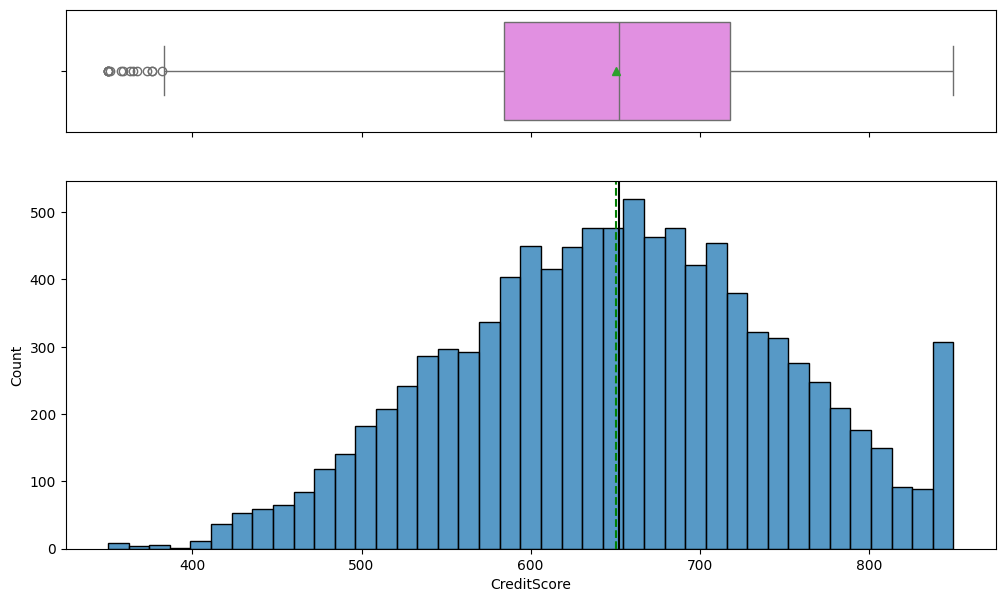

In [ ]:
histogram_boxplot(df,'CreditScore')

* CreditScore follows a normal distribution, with some minor spike at the higher values.
* There are some left outliers.

#### Observations on Age

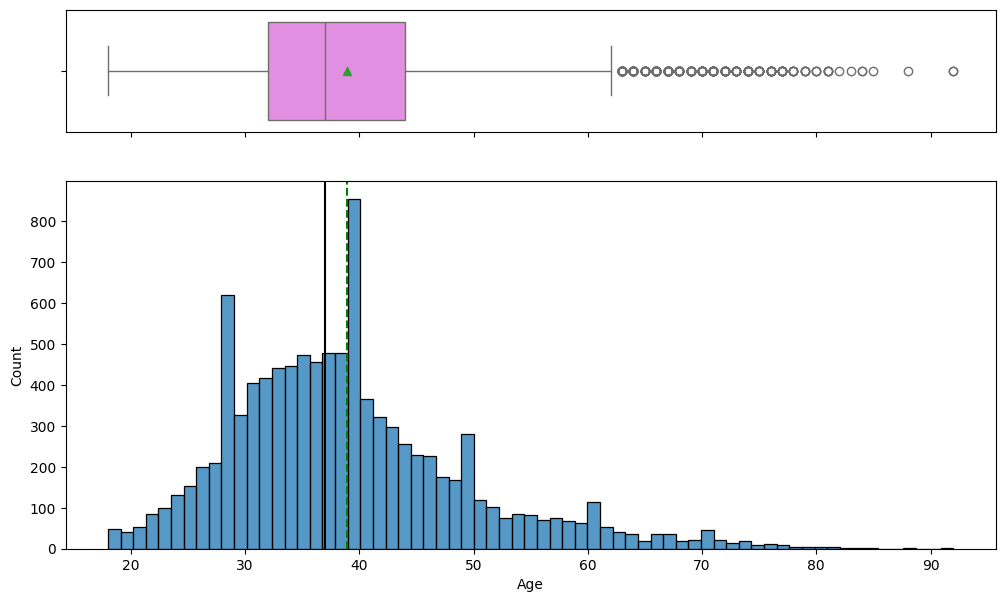

In [ ]:
histogram_boxplot(df,'Age')

* Age information is skewed to the right.
* There are right outliers in the data.

#### Observations on Balance

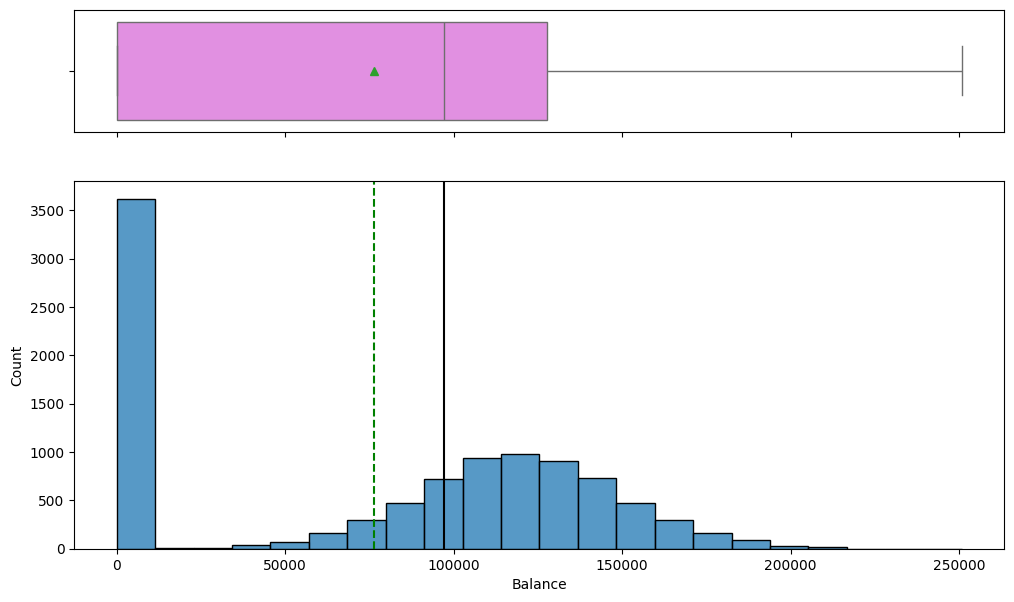

In [ ]:
histogram_boxplot(df,'Balance')

* Just over 3500 customers has the 'Balance' close to 0.
* Rest of the customer data follows a normal distribution.

#### Observations on Estimated Salary

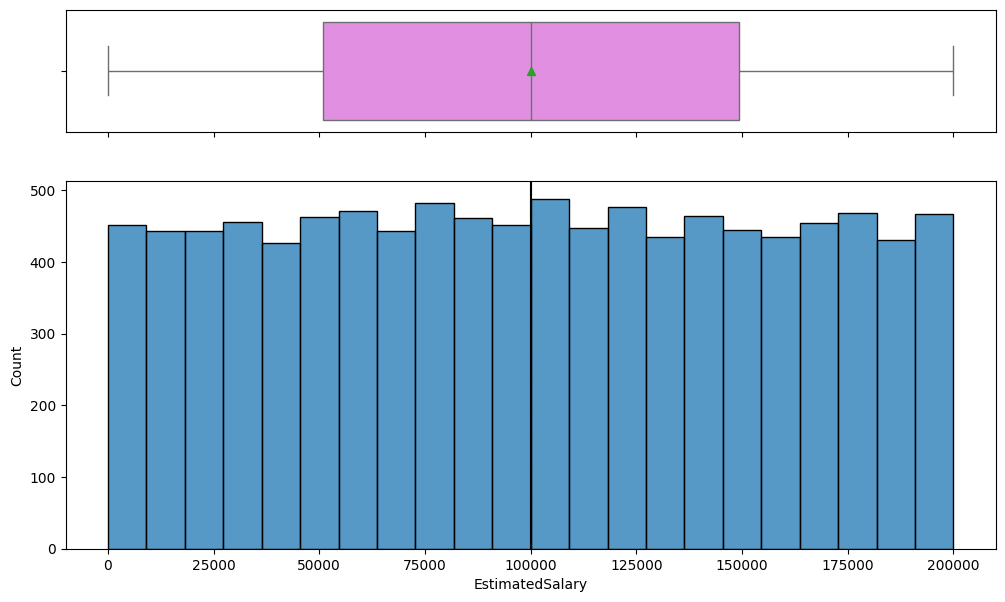

In [ ]:
histogram_boxplot(df,'EstimatedSalary')

* Estimated salary data follows a uniform distribution.
* There are not outliers in the data.

#### Observations on Exited

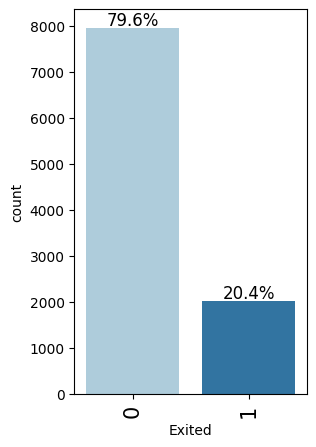

In [ ]:
labeled_barplot(df, 'Exited', perc=True)

* ~20% customers exited out of the bank in this dataset.
* Exited data is imbalanced.

#### Observations on Geography

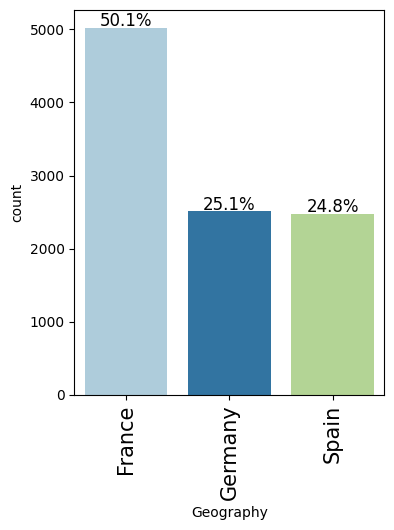

In [ ]:
labeled_barplot(df, 'Geography', perc=True)

* 50% customers are from 'France' and the left 25% each from 'Germany' and 'Spain'.

#### Observations on Gender

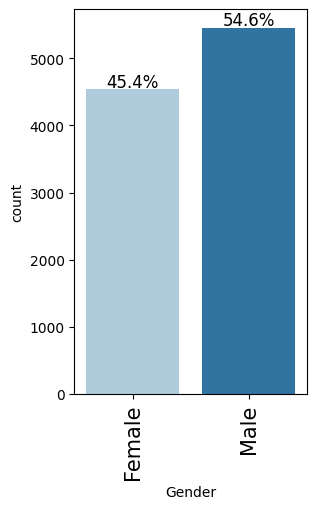

In [ ]:
labeled_barplot(df, 'Gender', perc=True)

* Customers are almost equally distributed between male and female.

#### Observations on Tenure

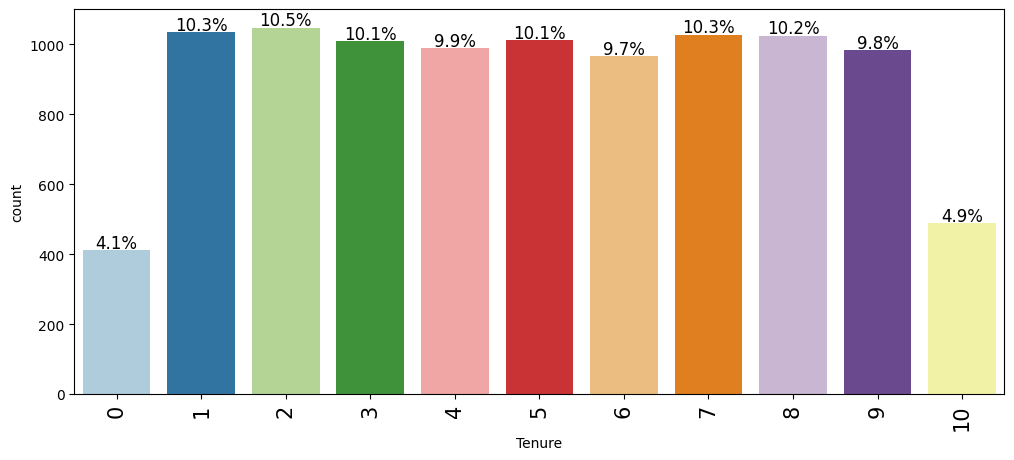

In [ ]:
labeled_barplot(df, 'Tenure', perc=True)

* Lowest (0 years) and highest (10 years) tenure customers are at ~5%, and the rest of the years in between these has equal number of customers at ~10%.

#### Observations on Number of Products

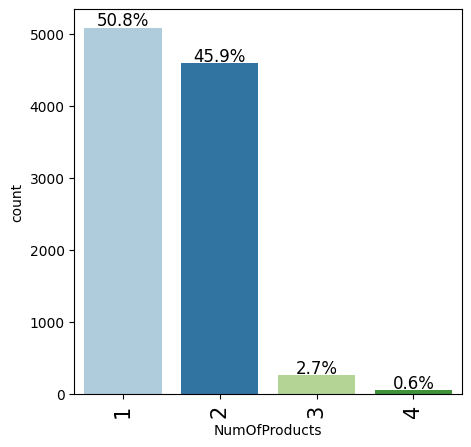

In [ ]:
labeled_barplot(df, 'NumOfProducts', perc=True)

* Bulk of the customers (~51% and ~46%) holds 1 or 2 bank products.

#### Observations on Has Credit Card

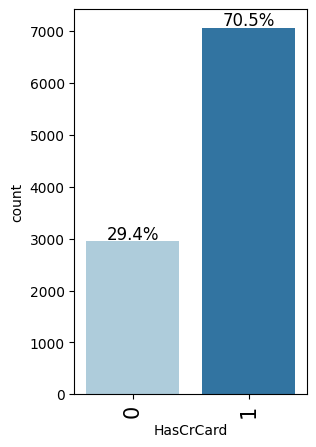

In [ ]:
labeled_barplot(df, 'HasCrCard', perc=True)

* ~70% customers has a credit card with the bank, and the rest does not.

#### Observations on Is Active Member

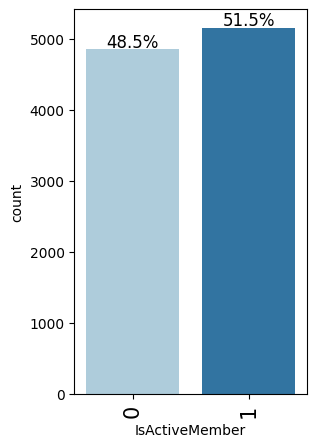

In [ ]:
labeled_barplot(df, 'IsActiveMember', perc=True)

* This data is distributed almost equally between the customers.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation between numerical data

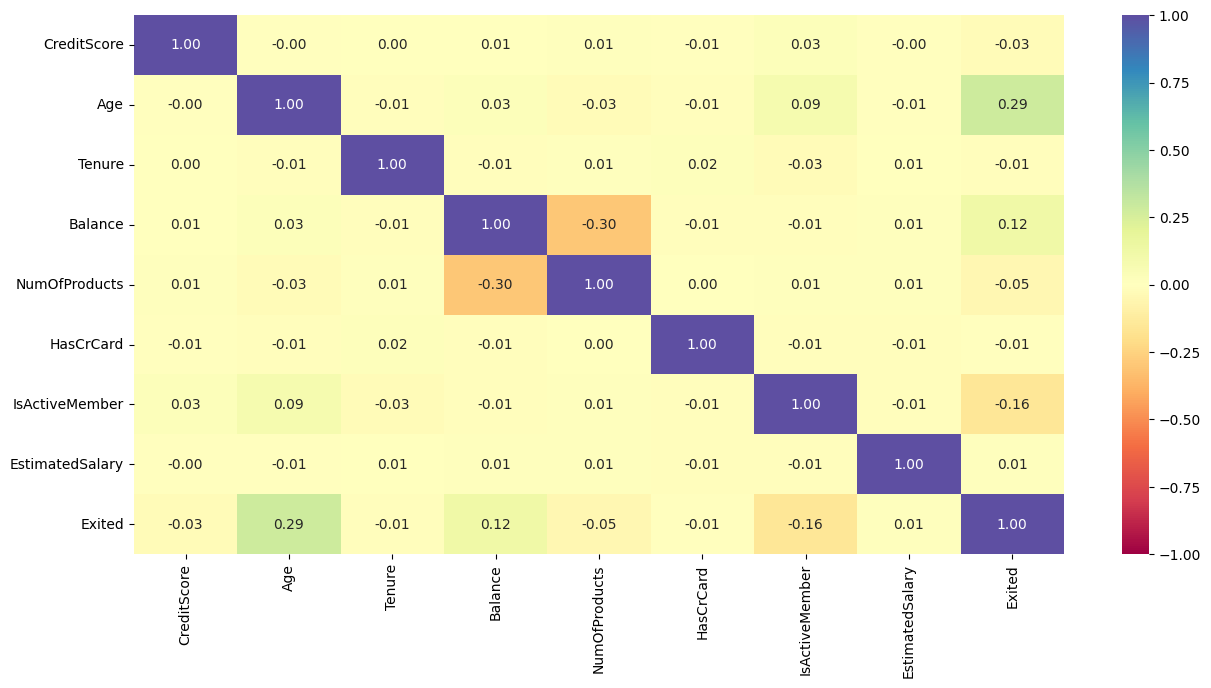

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* 'Exited' data has a slight positive correlation with 'Age'.
* 'Exited' data has a slight positive correlation with 'Balance'.
* 'Exited' data has a slight negative correlation with 'isActiveMember'.

#### Exited vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


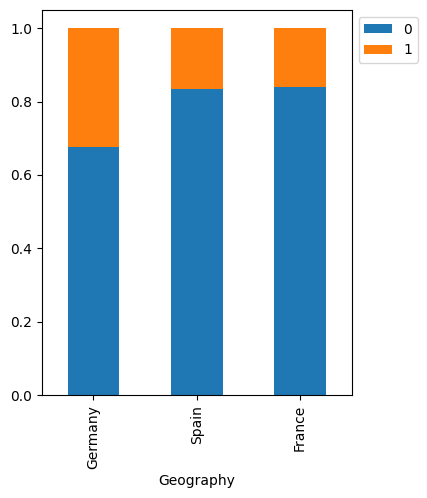

In [ ]:
stacked_barplot(df, "Geography", "Exited" )

* Customer exited from 'Germany' is relatively high compared to the other countries.

#### Exited vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


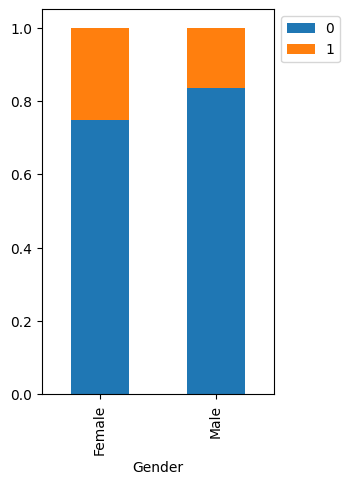

In [ ]:
stacked_barplot(df, "Gender", "Exited" )

* Female customers has a higher attrition compared to Male customers.

#### Exited vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


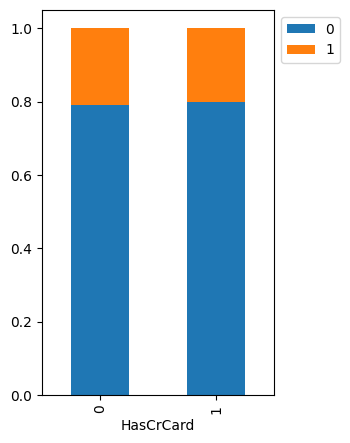

In [ ]:
stacked_barplot(df, "HasCrCard", "Exited" )

* This doesn't show any impact on exit status.

#### Exited vs Is Active Member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


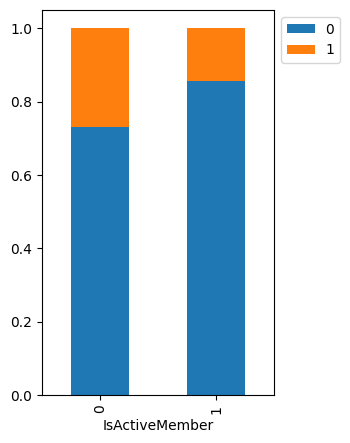

In [ ]:
stacked_barplot(df, "IsActiveMember", "Exited" )

* Customers who are not active shows higher attrition rate.

#### Exited vs Credit Score

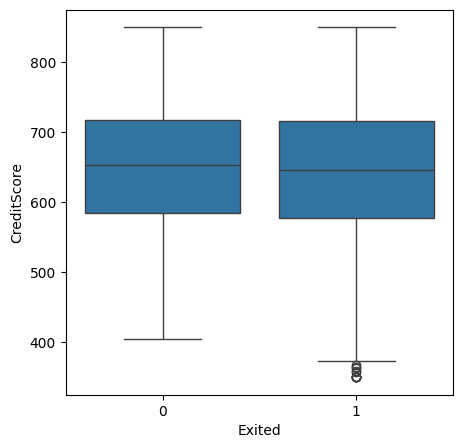

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=df)
plt.show()

* Both exited and available customers occupy almost the same credit score range.
* There are some outliers below 25% percentile of exited customers.

#### Exited vs Age

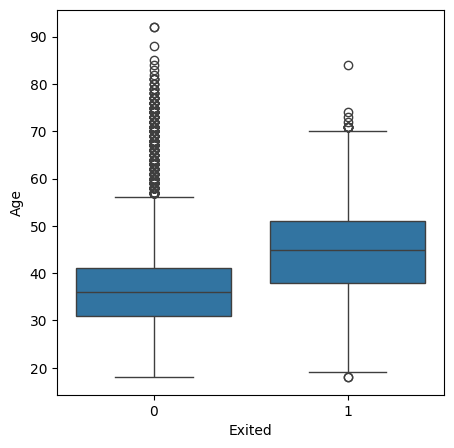

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=df)
plt.show()

* Exited customers has a higher mean Age value of around 45 compared to the other customers.

#### Exited vs Tenure

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


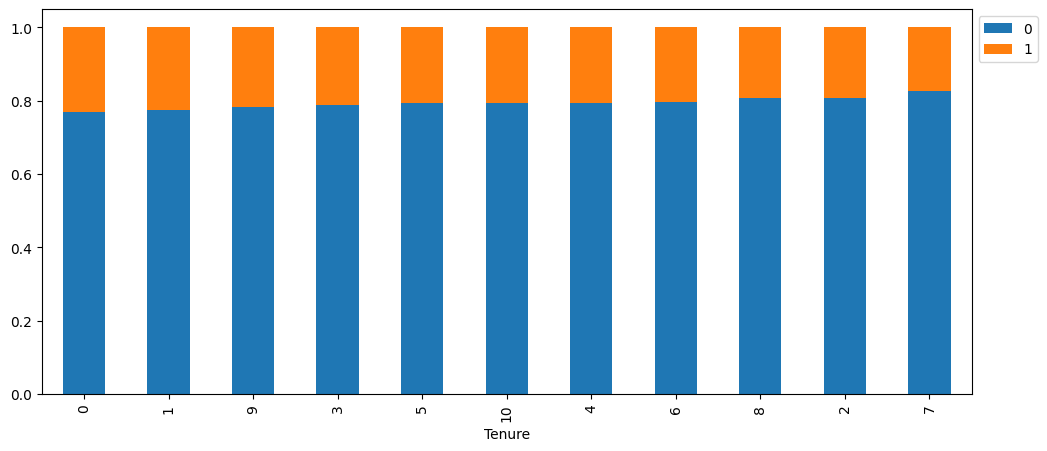

In [ ]:
stacked_barplot(df, "Tenure", "Exited" )

*  Tenure doesnt show too much impact on attrition rate.

#### Exited vs Balance

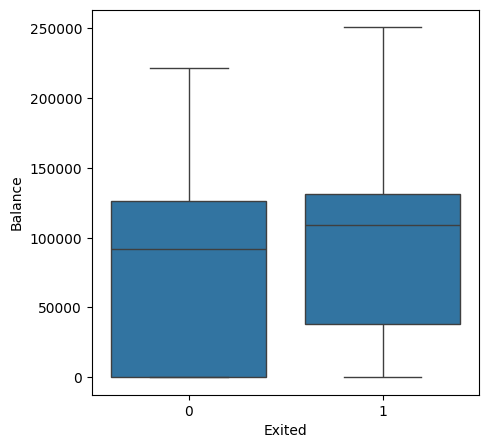

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=df)
plt.show()

* Exited customers average balance is higher compared to the others

#### Exited vs Number of Products

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


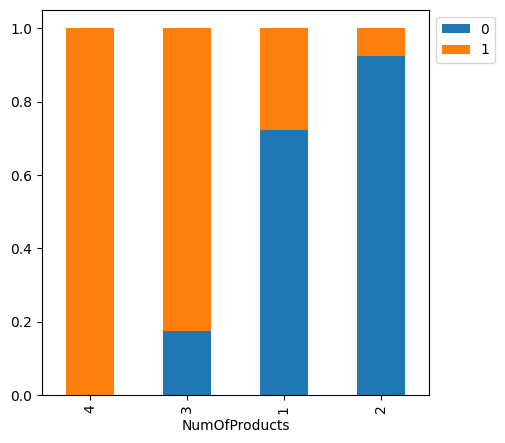

In [ ]:
stacked_barplot(df, "NumOfProducts", "Exited" )

* Based on the dataset, attrition is very high among customers with number of products 3 and 4.

#### Exited vs Estimated Salary

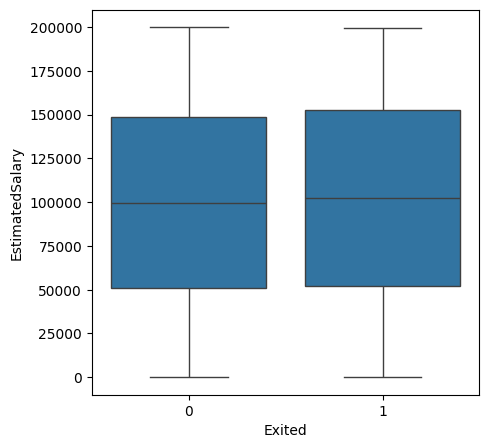

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=df)
plt.show()

* We cannot see much variance in the data here.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=["object"]).columns.tolist(), dtype=float, drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


### Train-validation-test Split

In [ ]:
# let's split the data into dependent and independent variables
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
# split the dataset into train, validation and test sets

# first we split data into 2 parts, as temporary and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
# now we split the temp data into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=1, stratify=y_temp)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 7650
Number of rows in validation data = 1350
Number of rows in test data = 1000


### Data Normalization

In [ ]:
# Define the columns to scale
num_columns_list = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Transform selected columns in X_train, X_val, and X_test using the fitted scaler
X_train[num_columns_list] = scaler.fit_transform(X_train[num_columns_list])
X_val[num_columns_list] = scaler.transform(X_val[num_columns_list])
X_test[num_columns_list] = scaler.transform(X_test[num_columns_list])

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5309,0.349208,-0.279677,-0.010625,1.563152,-0.905235,1,0,0.345444,0.0,1.0,0.0
3272,0.803848,1.909828,-0.355051,-1.225809,-0.905235,1,1,1.103185,0.0,0.0,0.0
1738,1.506473,0.196303,1.022652,0.495873,-0.905235,1,0,-1.418027,0.0,1.0,1.0
6980,-0.064101,-0.470068,1.711503,0.730798,0.804231,1,1,1.429248,1.0,0.0,0.0
8347,1.620133,-1.041243,0.678226,1.431676,2.513698,1,0,0.977108,0.0,1.0,0.0


## Model Building

### Model Evaluation Criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives?**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/recall

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Recall
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train recall or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation recall or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

From the Univariate Analysis on 'Exited' column, we have identified that there is an imbalance in class distribution, so we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

print(cw_dict)

{0: 1.2557452396585687, 1: 4.910141206675225}


### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding the hidden layer with 32 neurons and relu activation function
model_0.add(Dense(32, activation='relu'))
# Adding the output layer with 1 neuron and sigmoid activation function.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(0.001)
# Recall as the metric
metric = keras.metrics.Recall()
# Compile the model with binary cross entropy as loss function and recall as the metric
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# the epoch and batch_size is kept constant across all the models
epochs = 50
batch_size = 32

In [ ]:
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    epochs=epochs,
    class_weight=cw_dict,
    verbose=1
)

Epoch 1/50
240/240 [==============================] - 2s 3ms/step - loss: 1.3890 - recall: 0.6110 - val_loss: 0.7012 - val_recall: 0.5818
Epoch 2/50
240/240 [==============================] - 1s 2ms/step - loss: 1.3631 - recall: 0.5757 - val_loss: 0.6843 - val_recall: 0.5891
Epoch 3/50
240/240 [==============================] - 1s 2ms/step - loss: 1.3409 - recall: 0.6014 - val_loss: 0.6693 - val_recall: 0.6036
Epoch 4/50
240/240 [==============================] - 1s 2ms/step - loss: 1.3204 - recall: 0.6213 - val_loss: 0.6573 - val_recall: 0.6291
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 1.3012 - recall: 0.6425 - val_loss: 0.6475 - val_recall: 0.6509
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 1.2828 - recall: 0.6784 - val_loss: 0.6393 - val_recall: 0.6873
Epoch 7/50
240/240 [==============================] - 1s 2ms/step - loss: 1.2645 - recall: 0.6964 - val_loss: 0.6319 - val_recall: 0.7200
Epoch 8/50
240/240 [==============

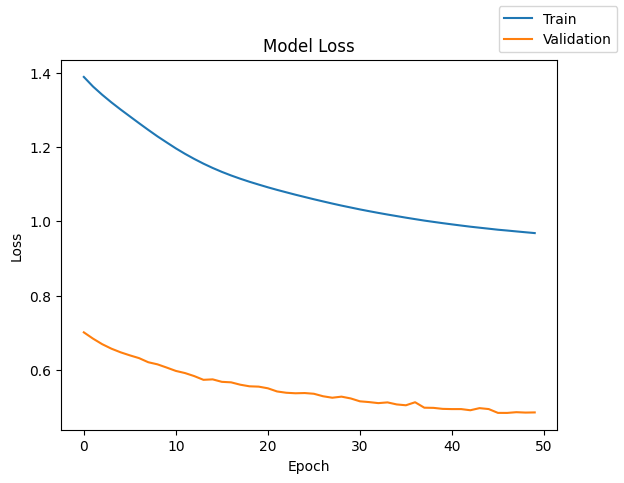

In [ ]:
# model loss for train and validation data
plot(history_0, 'loss')

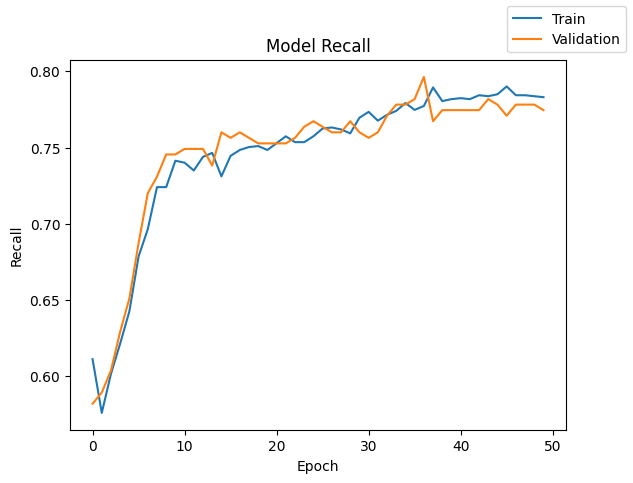

In [ ]:
# model recall for train and validation data
plot(history_0, 'recall')

* Recall value for training and validation set reached around 0.75 by 10 epochs and then started improving slowly until it reached around 40 epochs.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

240/240 [==============================] - 1s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

43/43 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
print('Training set:')
print(train_metric_df)
print('')
print('Validation set:')
print(valid_metric_df)

Training set:
               recall
NN with SGD  0.786264

Validation set:
               recall
NN with SGD  0.774545


**Classification report**

In [ ]:
#classification report on training set
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      6092
           1       0.45      0.79      0.57      1558

    accuracy                           0.76      7650
   macro avg       0.69      0.77      0.71      7650
weighted avg       0.83      0.76      0.78      7650



In [ ]:
#classification report on validation set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1075
           1       0.44      0.77      0.56       275

    accuracy                           0.76      1350
   macro avg       0.69      0.76      0.70      1350
weighted avg       0.83      0.76      0.78      1350



* The class 1 recall score for training and validation set is ~0.77

**Confusion matrix**

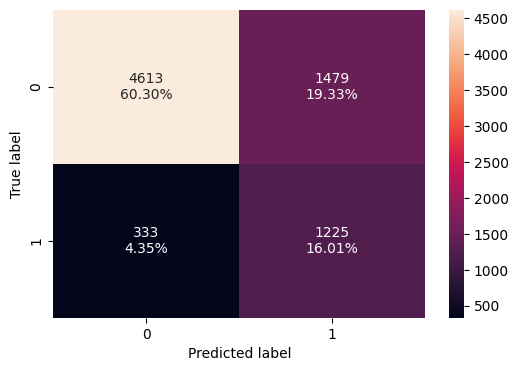

In [ ]:
# confusion matrix on training set
make_confusion_matrix(y_train, y_train_pred)

* False negatives is at around 4.35%

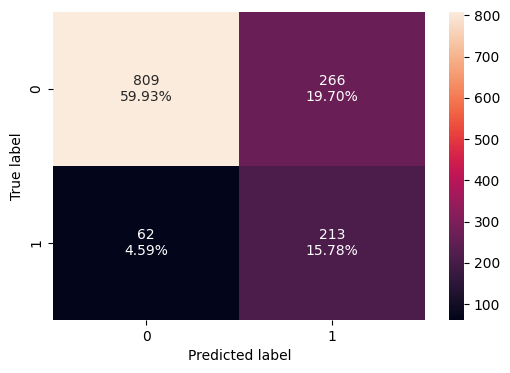

In [ ]:
# confusion matrix on validation set
make_confusion_matrix(y_val, y_val_pred)

* False negatives is at around 4.59%

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_1.add(Dense(64, activation='relu', input_dim = X_train.shape[1], kernel_initializer='he_normal'))
# Adding the hidden layer with 32 neurons and relu activation function
model_1.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding the output layer with 1 neuron and sigmoid activation function.
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adam as the optimizer with a lower initial learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# Recall as the metric
metric = keras.metrics.Recall()
# Compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    epochs=epochs,
    class_weight=cw_dict,
    verbose=1
)

Epoch 1/50
240/240 [==============================] - 2s 3ms/step - loss: 1.4115 - recall: 0.5719 - val_loss: 0.6406 - val_recall: 0.5564
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2836 - recall: 0.6027 - val_loss: 0.6250 - val_recall: 0.7164
Epoch 3/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2125 - recall: 0.7015 - val_loss: 0.5824 - val_recall: 0.7055
Epoch 4/50
240/240 [==============================] - 1s 2ms/step - loss: 1.1625 - recall: 0.7279 - val_loss: 0.5828 - val_recall: 0.7636
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 1.1243 - recall: 0.7407 - val_loss: 0.5711 - val_recall: 0.7818
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 1.0947 - recall: 0.7529 - val_loss: 0.5558 - val_recall: 0.7745
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 1.0708 - recall: 0.7657 - val_loss: 0.5456 - val_recall: 0.7673
Epoch 8/50
240/240 [==============

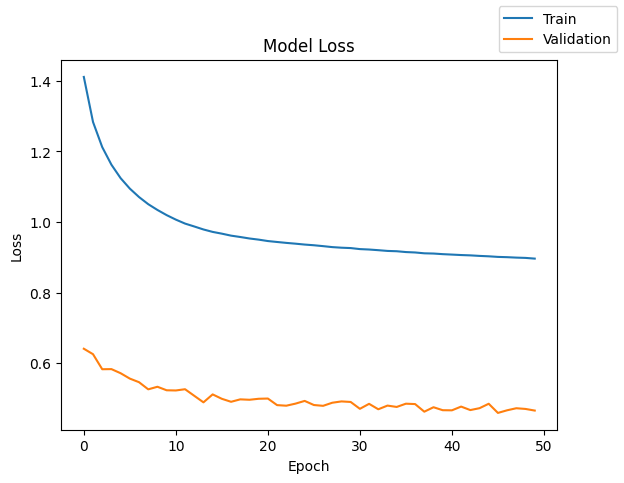

In [ ]:
# model loss for train and validation data
plot(history_1, 'loss')

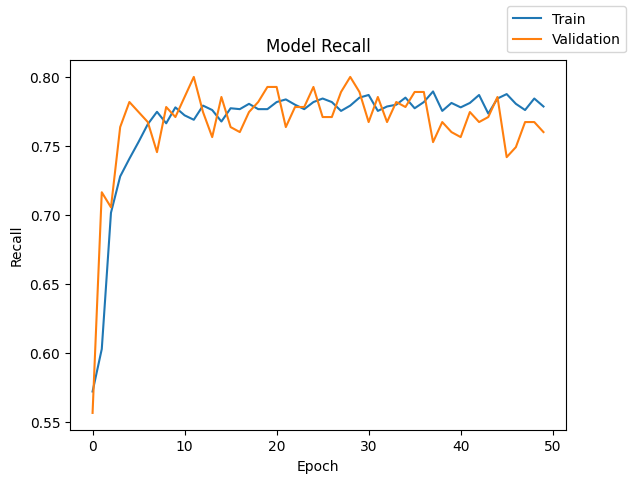

In [ ]:
# model recall for train and validation data
plot(history_1, 'recall')

* Recall score went up to around 0.77 in about 5 epochs and then stayed there for training and validation set in a zig-zag format.
* We see a minor case of overfitting from around 40 epochs.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

240/240 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

43/43 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
print('Training set:')
print(train_metric_df)
print('')
print('Validation set:')
print(valid_metric_df)

Training set:
                recall
NN with SGD   0.786264
NN with Adam  0.780488

Validation set:
                recall
NN with SGD   0.774545
NN with Adam  0.760000


**Classification report**

In [ ]:
# classification report on training set
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6092
           1       0.50      0.78      0.61      1558

    accuracy                           0.80      7650
   macro avg       0.72      0.79      0.74      7650
weighted avg       0.85      0.80      0.81      7650



In [ ]:
# classification report on validation set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1075
           1       0.46      0.76      0.57       275

    accuracy                           0.77      1350
   macro avg       0.69      0.77      0.71      1350
weighted avg       0.83      0.77      0.79      1350



* The recall score for training and validation set is ~77%.

**Confusion matrix**

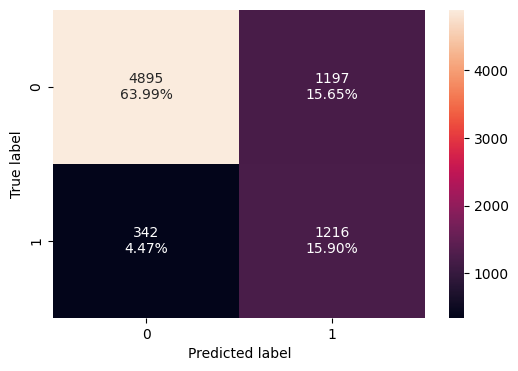

In [ ]:
# calculating the confusion matrix on training set
make_confusion_matrix(y_train, y_train_pred)

* False negatives is around 4.5% for training set.

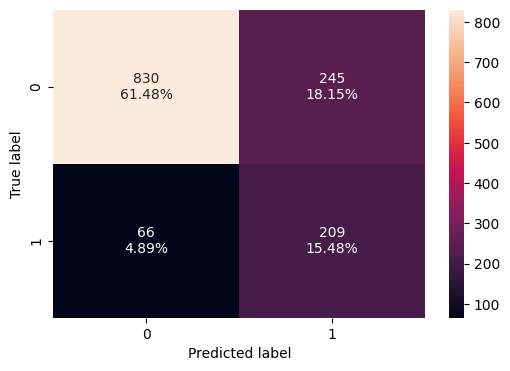

In [ ]:
# calculating the confusion matrix on validation set
make_confusion_matrix(y_val, y_val_pred)

* False negatives is around 4.89% for validation set.

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_2.add(Dense(64, activation='relu', input_dim = X_train.shape[1], kernel_initializer='he_normal'))
# Adding the dropout layer with ratio of 0.2
model_2.add(Dropout(0.2))
# Adding the hidden layer with 32 neurons and relu activation function
model_2.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding the dropout layer with ratio of 0.1
model_2.add(Dropout(0.1))
# Adding the output layer with 1 neuron and sigmoid activation function.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adam as the optimizer with a lower initial learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# Recall as the metric
metric = keras.metrics.Recall()
# Compile the model with binary cross entropy as loss function and recall as the metric
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    epochs=epochs,
    class_weight=cw_dict,
    verbose=1
)

Epoch 1/50
240/240 [==============================] - 2s 4ms/step - loss: 1.4898 - recall: 0.5571 - val_loss: 0.6674 - val_recall: 0.6255
Epoch 2/50
240/240 [==============================] - 1s 3ms/step - loss: 1.3693 - recall: 0.5950 - val_loss: 0.6390 - val_recall: 0.6945
Epoch 3/50
240/240 [==============================] - 1s 3ms/step - loss: 1.3049 - recall: 0.6341 - val_loss: 0.6049 - val_recall: 0.7164
Epoch 4/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2603 - recall: 0.6682 - val_loss: 0.5983 - val_recall: 0.7491
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2334 - recall: 0.6797 - val_loss: 0.5918 - val_recall: 0.7527
Epoch 6/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2014 - recall: 0.7118 - val_loss: 0.5742 - val_recall: 0.7418
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 1.1908 - recall: 0.7054 - val_loss: 0.5705 - val_recall: 0.7564
Epoch 8/50
240/240 [==============

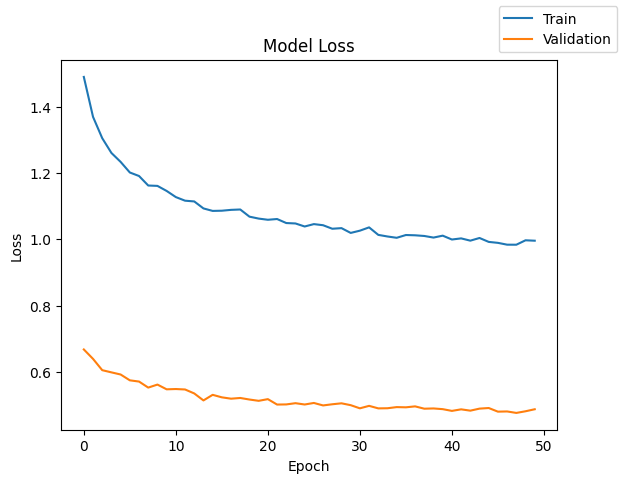

In [ ]:
# model loss for train and validation data
plot(history_2, 'loss')

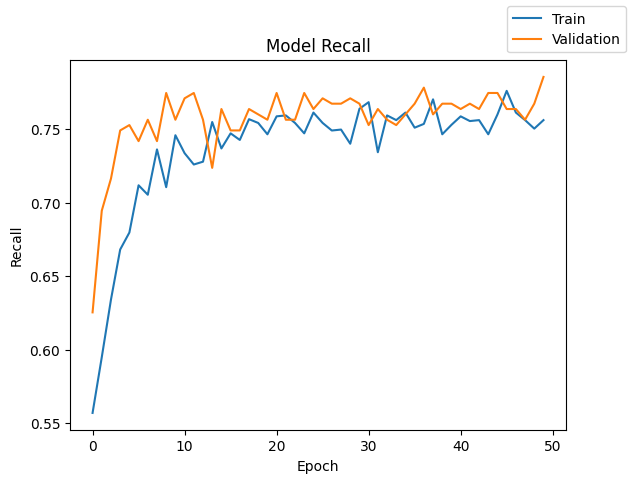

In [ ]:
# model recall for train and validation data
plot(history_2, 'recall')

* With dropout added, we are not seeing overfitting anymore as the recall value for train and validation are overlapping and increasing in the same way.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

240/240 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

43/43 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
print('Training set:')
print(train_metric_df)
print('')
print('Validation set:')
print(valid_metric_df)

Training set:
                          recall
NN with SGD             0.786264
NN with Adam            0.780488
NN with Adam & Dropout  0.785623

Validation set:
                          recall
NN with SGD             0.774545
NN with Adam            0.760000
NN with Adam & Dropout  0.785455


**Classification report**

In [ ]:
# classification report for training set
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      6092
           1       0.46      0.79      0.58      1558

    accuracy                           0.77      7650
   macro avg       0.70      0.78      0.71      7650
weighted avg       0.84      0.77      0.79      7650



In [ ]:
# classification report for validation set
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1075
           1       0.44      0.79      0.57       275

    accuracy                           0.76      1350
   macro avg       0.69      0.77      0.70      1350
weighted avg       0.83      0.76      0.78      1350



* The recall score for training and validation set is ~79%.

**Confusion matrix**

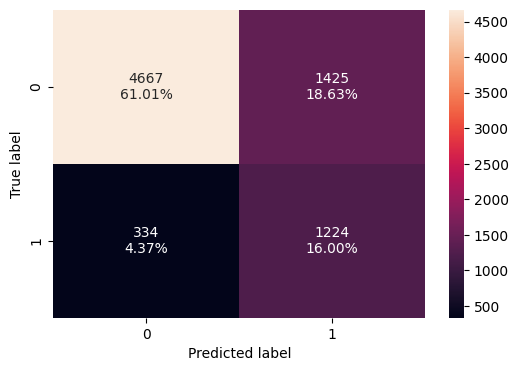

In [ ]:
# calculating the confusion matrix on training set
make_confusion_matrix(y_train, y_train_pred)

* False negatives is around 4.38%.

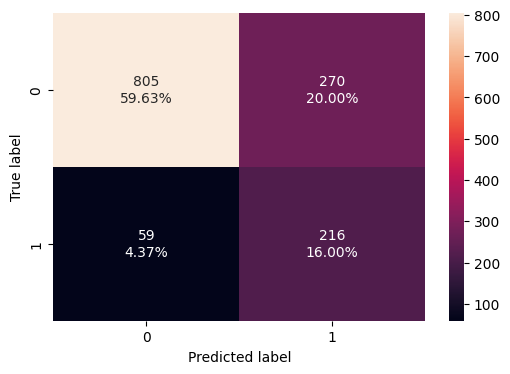

In [ ]:
# calculating the confusion matrix on validation set
make_confusion_matrix(y_val, y_val_pred)

* False negatives is around 4.37%

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Apply SMOTE to balance this dataset**

In [ ]:
sm = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, the shape of X_train: {}".format(X_train_over.shape))
print("After Oversampling, the shape of y_train: {} \n".format(y_train_over.shape))

print("Before Oversampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

After Oversampling, the shape of X_train: (12184, 11)
After Oversampling, the shape of y_train: (12184,) 

Before Oversampling, counts of label '1': 1558
Before Oversampling, counts of label '0': 6092 

After Oversampling, counts of label '1': 6092
After Oversampling, counts of label '0': 6092 



In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
#Initializing the neural network
model_3 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_3.add(Dense(64, activation='relu', input_dim = X_train_over.shape[1], kernel_initializer='he_normal'))
# Adding the hidden layer with 32 neurons and relu activation function
model_3.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding the output layer with 1 neuron and sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(0.001)
# Recall as the metric
metric = keras.metrics.Recall()
# Compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(
    X_train_over, y_train_over,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    epochs=epochs,
    class_weight={0: 1, 1: 1.4}, # Adding a higher weight for class 1 for better recall
    verbose=1
)

Epoch 1/50
381/381 [==============================] - 2s 3ms/step - loss: 0.8570 - recall: 0.6883 - val_loss: 0.7537 - val_recall: 0.7382
Epoch 2/50
381/381 [==============================] - 1s 2ms/step - loss: 0.7985 - recall: 0.7684 - val_loss: 0.7209 - val_recall: 0.8218
Epoch 3/50
381/381 [==============================] - 1s 2ms/step - loss: 0.7596 - recall: 0.8189 - val_loss: 0.6977 - val_recall: 0.8327
Epoch 4/50
381/381 [==============================] - 1s 2ms/step - loss: 0.7308 - recall: 0.8363 - val_loss: 0.6794 - val_recall: 0.8291
Epoch 5/50
381/381 [==============================] - 1s 2ms/step - loss: 0.7082 - recall: 0.8413 - val_loss: 0.6700 - val_recall: 0.8364
Epoch 6/50
381/381 [==============================] - 1s 2ms/step - loss: 0.6896 - recall: 0.8470 - val_loss: 0.6642 - val_recall: 0.8255
Epoch 7/50
381/381 [==============================] - 1s 2ms/step - loss: 0.6744 - recall: 0.8496 - val_loss: 0.6506 - val_recall: 0.8218
Epoch 8/50
381/381 [==============

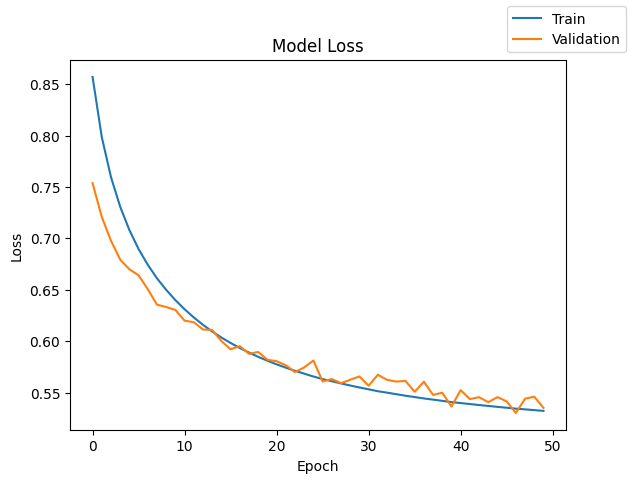

In [ ]:
# model loss for train and validation data
plot(history_3, 'loss')

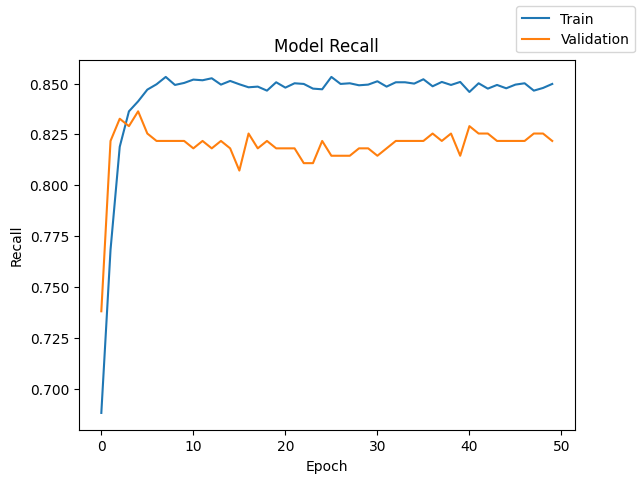

In [ ]:
# model recall for train and validation data
plot(history_3, 'recall')

* Oversampling the data made improvements to the recall value for both train and validation set compared to the previous models.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train_over)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

381/381 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

43/43 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
print('Training set:')
print(train_metric_df)
print('')
print('Validation set:')
print(valid_metric_df)

Training set:
                          recall
NN with SGD             0.786264
NN with Adam            0.780488
NN with Adam & Dropout  0.785623
NN with SMOTE & SGD     0.844879

Validation set:
                          recall
NN with SGD             0.774545
NN with Adam            0.760000
NN with Adam & Dropout  0.785455
NN with SMOTE & SGD     0.821818


**Classification report**

In [ ]:
# for training set
cr = classification_report(y_train_over,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      6092
           1       0.75      0.84      0.79      6092

    accuracy                           0.78     12184
   macro avg       0.78      0.78      0.78     12184
weighted avg       0.78      0.78      0.78     12184



In [ ]:
# for validation set
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1075
           1       0.41      0.82      0.55       275

    accuracy                           0.72      1350
   macro avg       0.67      0.76      0.67      1350
weighted avg       0.83      0.72      0.75      1350



* The class 1 recall score for training and validation set is ~83% which is better than previous models.

**Confusion matrix**

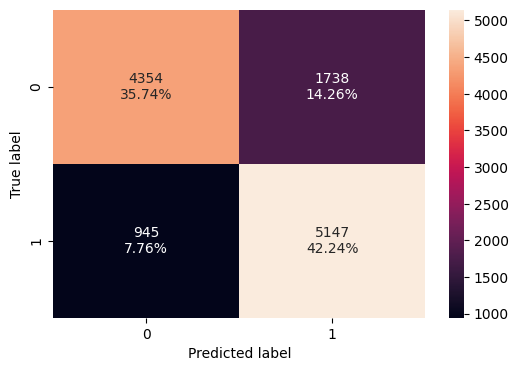

In [ ]:
# calculating the confusion matrix for training set
make_confusion_matrix(y_train_over, y_train_pred)

* False negatives is around 7.7%.

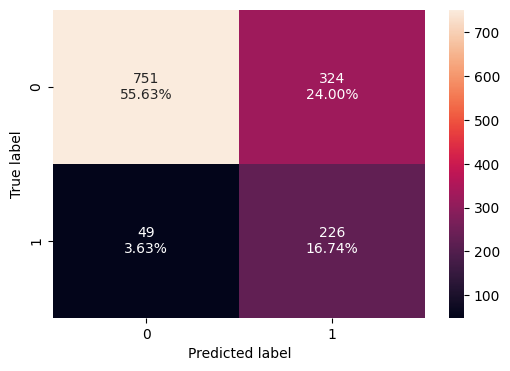

In [ ]:
# calculating the confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

* False negatives is around 3.6%.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
#Initializing the neural network
model_4 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_4.add(Dense(64, activation='relu', input_dim = X_train_over.shape[1], kernel_initializer='he_normal'))
# Adding the hidden layer with 32 neurons and relu activation function
model_4.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding the output layer with 1 neuron and sigmoid activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adam as the optimizer with a lower initial learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# Recall as the metric
metric = keras.metrics.Recall()
# Compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(
    X_train_over, y_train_over,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    epochs=epochs,
    class_weight={0: 1, 1: 1.4}, # Adding a higher weight for class 1 for better recall
    verbose=1
)

Epoch 1/50
381/381 [==============================] - 3s 3ms/step - loss: 0.7955 - recall: 0.7835 - val_loss: 0.6794 - val_recall: 0.8291
Epoch 2/50
381/381 [==============================] - 1s 2ms/step - loss: 0.6803 - recall: 0.8482 - val_loss: 0.6285 - val_recall: 0.8255
Epoch 3/50
381/381 [==============================] - 1s 2ms/step - loss: 0.6220 - recall: 0.8533 - val_loss: 0.6132 - val_recall: 0.8364
Epoch 4/50
381/381 [==============================] - 1s 2ms/step - loss: 0.5857 - recall: 0.8537 - val_loss: 0.5688 - val_recall: 0.8000
Epoch 5/50
381/381 [==============================] - 1s 2ms/step - loss: 0.5642 - recall: 0.8508 - val_loss: 0.5573 - val_recall: 0.8000
Epoch 6/50
381/381 [==============================] - 1s 2ms/step - loss: 0.5503 - recall: 0.8487 - val_loss: 0.5531 - val_recall: 0.8036
Epoch 7/50
381/381 [==============================] - 1s 2ms/step - loss: 0.5408 - recall: 0.8487 - val_loss: 0.5376 - val_recall: 0.7964
Epoch 8/50
381/381 [==============

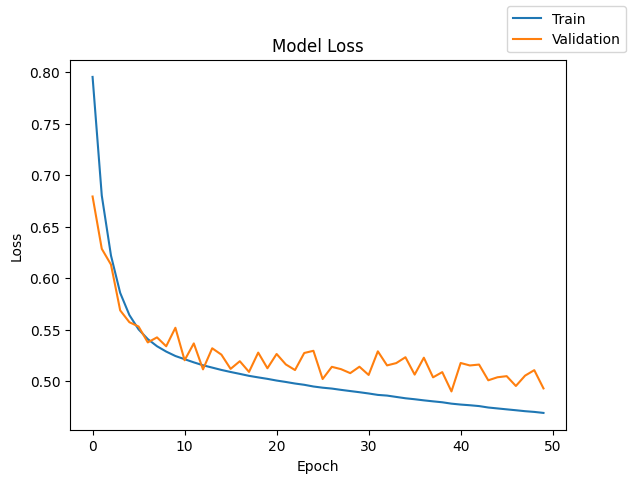

In [ ]:
# model loss for train and validation data
plot(history_4, 'loss')

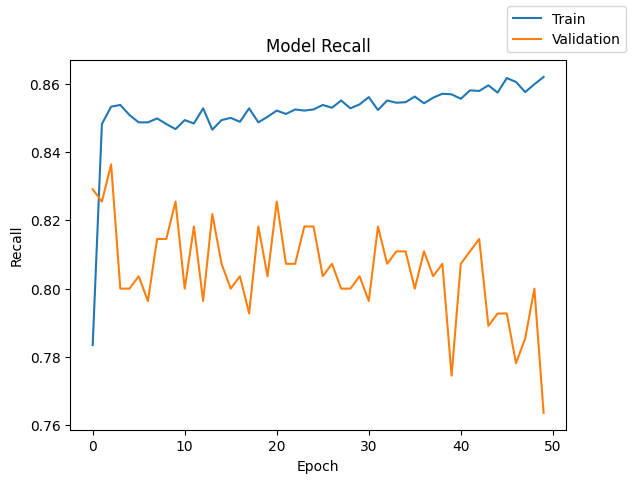

In [ ]:
# model recall for train and validation data
plot(history_4, 'recall')

* Recall for training set keeps improving with epoch count and reached around 0.87 at 50 epochs.
* Recall for validation set is hovering around 0.80 to 0.77 without too much improvements with epoch.
* This is a highly overfitted model.

In [ ]:
y_train_pred = model_4.predict(X_train_over)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

381/381 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

43/43 [==============================] - 0s 3ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
print('Training set:')
print(train_metric_df)
print('')
print('Validation set:')
print(valid_metric_df)

Training set:
                          recall
NN with SGD             0.786264
NN with Adam            0.780488
NN with Adam & Dropout  0.785623
NN with SMOTE & SGD     0.844879
NN with SMOTE & Adam    0.851116

Validation set:
                          recall
NN with SGD             0.774545
NN with Adam            0.760000
NN with Adam & Dropout  0.785455
NN with SMOTE & SGD     0.821818
NN with SMOTE & Adam    0.763636


**Classification report**

In [ ]:
# for training set
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      6092
           1       0.80      0.85      0.82      6092

    accuracy                           0.82     12184
   macro avg       0.82      0.82      0.82     12184
weighted avg       0.82      0.82      0.82     12184



In [ ]:
# for validation set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1075
           1       0.44      0.76      0.56       275

    accuracy                           0.75      1350
   macro avg       0.68      0.76      0.69      1350
weighted avg       0.83      0.75      0.77      1350



* The class 1 recall score for training and validation set is ~85% and ~79% which suggests that this is a highly overfitted model.
* The training set recall score of ~85% is the highest that we have got thus far compared to the other models.

**Confusion matrix**

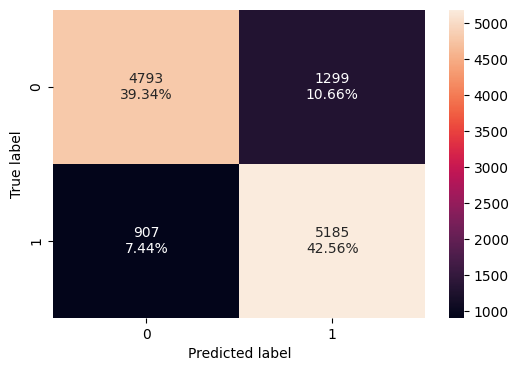

In [ ]:
# calculating the confusion matrix
make_confusion_matrix(y_train_over, y_train_pred)

* False negatives is around 7.4%.

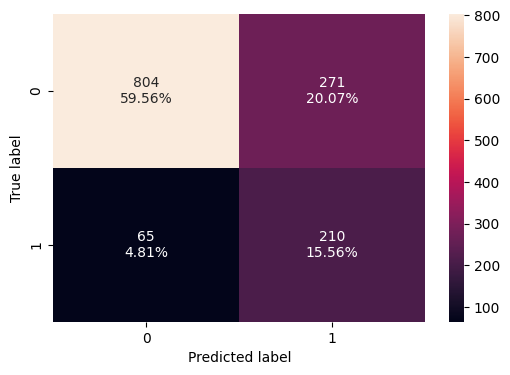

In [ ]:
# calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

* False negatives is around 4.8%.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
#Initializing the neural network
model_5 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_5.add(Dense(64, activation='relu', input_dim = X_train_over.shape[1], kernel_initializer='he_normal'))
# Adding the dropout layer with ratio of 0.3
model_5.add(Dropout(0.4))
# Adding the hidden layer with 32 neurons and relu activation function
model_5.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# Adding the dropout layer with ratio of 0.3
model_5.add(Dropout(0.4))
# Adding the output layer with 1 neuron and sigmoid activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adam as the optimizer with a lower initial learning rate
lr = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
# Recall as the metric
metric = keras.metrics.Recall()
# Compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_5 = model_5.fit(
    X_train_over, y_train_over,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    epochs=epochs,
    class_weight={0: 1, 1: 1.4}, # Adding a higher weight for class 1 for better recall
    verbose=1
)

Epoch 1/50
381/381 [==============================] - 3s 4ms/step - loss: 0.9876 - recall: 0.6184 - val_loss: 0.7581 - val_recall: 0.8545
Epoch 2/50
381/381 [==============================] - 1s 3ms/step - loss: 0.8763 - recall: 0.6845 - val_loss: 0.7199 - val_recall: 0.8909
Epoch 3/50
381/381 [==============================] - 1s 3ms/step - loss: 0.8109 - recall: 0.7390 - val_loss: 0.6785 - val_recall: 0.8545
Epoch 4/50
381/381 [==============================] - 1s 3ms/step - loss: 0.7743 - recall: 0.7595 - val_loss: 0.6583 - val_recall: 0.8436
Epoch 5/50
381/381 [==============================] - 1s 3ms/step - loss: 0.7583 - recall: 0.7774 - val_loss: 0.6539 - val_recall: 0.8618
Epoch 6/50
381/381 [==============================] - 1s 3ms/step - loss: 0.7327 - recall: 0.7889 - val_loss: 0.6410 - val_recall: 0.8473
Epoch 7/50
381/381 [==============================] - 1s 3ms/step - loss: 0.7185 - recall: 0.7940 - val_loss: 0.6229 - val_recall: 0.8400
Epoch 8/50
381/381 [==============

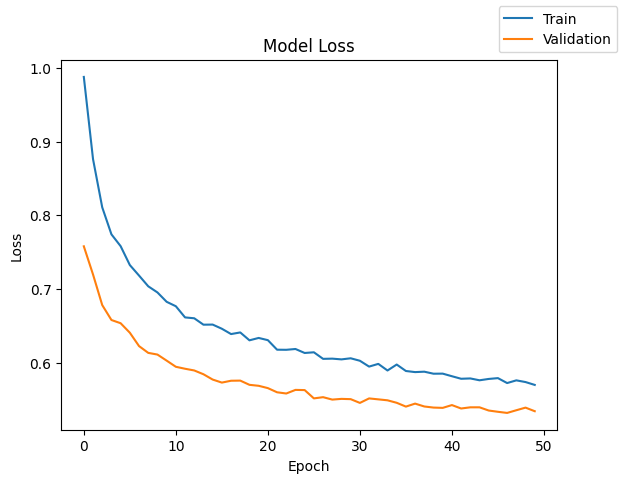

In [ ]:
# model loss for train and validation data
plot(history_5, 'loss')

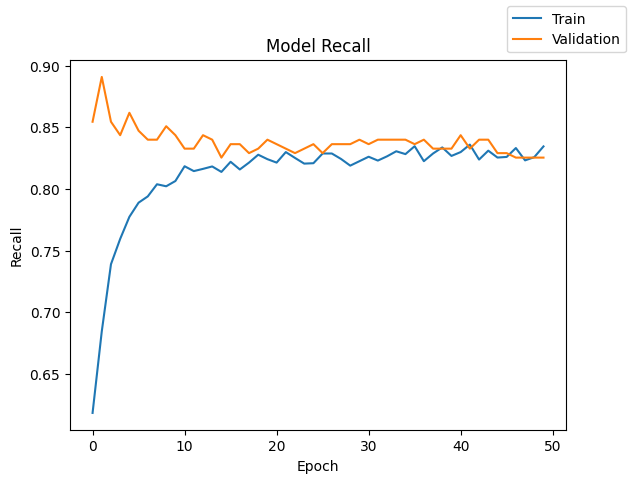

In [ ]:
# model recall for train and validation data
plot(history_5, 'recall')

* Recall for training set keeps improving with epoch count and reached around 0.83 at 50 epochs.
* Recall for validation set is hovering around 0.85 to 0.82.
* We dont see too much overfitting anymore as we used dropouts.

In [ ]:
y_train_pred = model_5.predict(X_train_over)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

381/381 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

43/43 [==============================] - 0s 3ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
model_name = "NN with SMOTE, Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)
print('Training set:')
print(train_metric_df)
print('')
print('Validation set:')
print(valid_metric_df)

Training set:
                                 recall
NN with SGD                    0.786264
NN with Adam                   0.780488
NN with Adam & Dropout         0.785623
NN with SMOTE & SGD            0.844879
NN with SMOTE & Adam           0.851116
NN with SMOTE, Adam & Dropout  0.858339

Validation set:
                                 recall
NN with SGD                    0.774545
NN with Adam                   0.760000
NN with Adam & Dropout         0.785455
NN with SMOTE & SGD            0.821818
NN with SMOTE & Adam           0.763636
NN with SMOTE, Adam & Dropout  0.825455


**Classification report**

In [ ]:
# for training set
cr = classification_report(y_train_over, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      6092
           1       0.75      0.86      0.80      6092

    accuracy                           0.79     12184
   macro avg       0.79      0.79      0.79     12184
weighted avg       0.79      0.79      0.79     12184



In [ ]:
# for validation set
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1075
           1       0.41      0.83      0.55       275

    accuracy                           0.73      1350
   macro avg       0.68      0.76      0.68      1350
weighted avg       0.83      0.73      0.75      1350



* The class 1 recall score for training and validation set is ~86% and ~83%.

**Confusion matrix**

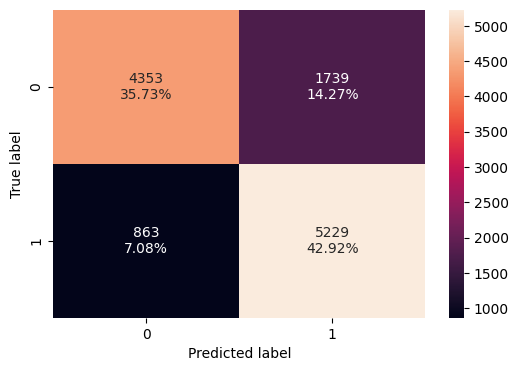

In [ ]:
# calculating the confusion matrix for training set
make_confusion_matrix(y_train_over, y_train_pred)

* False negatives is around 7%.

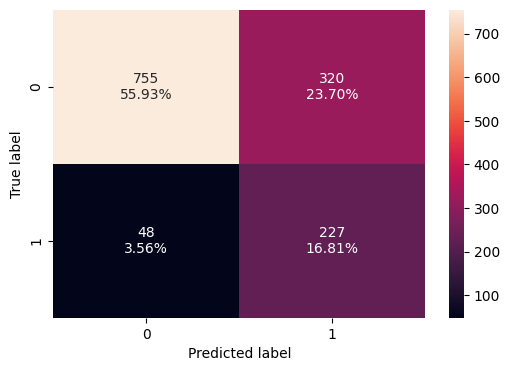

In [ ]:
# calculating the confusion matrix for validation set
make_confusion_matrix(y_val, y_val_pred)

* False negatives is around 3.5%.

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training set performance comparison")
train_metric_df

Training set performance comparison


,recall
NN with SGD,0.786264
NN with Adam,0.780488
NN with Adam & Dropout,0.785623
NN with SMOTE & SGD,0.844879
NN with SMOTE & Adam,0.851116
"NN with SMOTE, Adam & Dropout",0.858339


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.774545
NN with Adam,0.760000
NN with Adam & Dropout,0.785455
NN with SMOTE & SGD,0.821818
NN with SMOTE & Adam,0.763636
"NN with SMOTE, Adam & Dropout",0.825455


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.011719
NN with Adam,0.020488
NN with Adam & Dropout,0.000168
NN with SMOTE & SGD,0.023060
NN with SMOTE & Adam,0.087480
"NN with SMOTE, Adam & Dropout",0.032884


- Final model selected: **NN with SMOTE, Adam & Dropout**
- Reasoning:
  - **NN with SMOTE, Adam & Dropout** model has a good recall score of 0.85 for training set and 0.83 for validation set which shows better generalization than the other models with comparable training recall scores.
  - While **NN with SMOTE & SGD** model also shows good generalization, its training score is lower compared to this model.
  - **NN with SMOTE, Adam & Dropout** model has the best recall score for the validation set compared to the other models, which shows its effectiveness in new data scenarios.


In [ ]:
# use the best model 'model_5' to predict against test data set
y_test_pred = model_5.predict(X_test)
#Predicting the results using 0.5 as the threshold
y_test_pred = (y_test_pred > 0.5)
y_test_pred

32/32 [==============================] - 0s 4ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [ ]:
# lets print the classification report
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       796
           1       0.41      0.76      0.53       204

    accuracy                           0.72      1000
   macro avg       0.66      0.74      0.67      1000
weighted avg       0.82      0.72      0.75      1000



- The class 1 Recall score on the test data is ~0.76
- This suggests a moderate performance in accurately classifying false negatives.

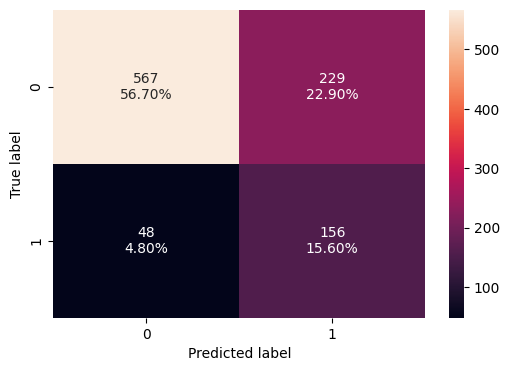

In [ ]:
# calculating the confusion matrix on test set
make_confusion_matrix(y_test, y_test_pred)

- False negatives reported (who exited even if the model predicted them not to exit) on the test set is ~4.80%.
- False positives (who didn't exit even if the model predicted an exit) is a bit high at 22.90% as we have given more class weight to 'Class 1' during model training. This overhead is manageable by the bank as their focus should be to retain as much customers as possible.

## Actionable Insights and Business Recommendations

* The bank can deploy the final model selected above to predict with a considerable level of accuracy to determine whether a customer will leave the bank or not in the next 6 months.
* Bank can focus on those probable customers identified by the model to improve their customer satisfaction and address their grievances on priority.
* Attrition rates are notably higher in Germany compared to other countries. Implement targeted strategies to improve customer satisfaction and address specific concerns within the German market.
* Female customers show a higher churn rate. Analyze the reasons behind this and provide services to better cater to their needs and preferences.
* Inactive customers have a higher probability of exiting. Implement initiatives to encourage engagement, such as rewards programs, personalized communication, or offers specific to their banking habits.
* The data shows a higher churn rate for customers with three or four bank products. Investigate potential reasons for dissatisfaction with these customers. It might be related to complexity of products or lack of support.
* Customers with a higher average age tend to churn more. Review services offered to this demographic, as their needs and preferences might differ from younger customers. Consider personalized offers or specialized service.
* Customers with higher average balances are more prone to exit. Understand their requirements and concerns. They may be seeking better interest rates or investment options. Provide premium solutions to retain these valuable customers.



<font size=6 color='blue'>Power Ahead</font>
___